## Now Start to Develop a Convolutional Neural Network to classify MNIST Handwritten Digits images.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers


MNIST Dataset
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#loaded datasets summary
print("Train:","x=",x_train.shape,"y=",y_train.shape)
print("Test:","x=",x_test.shape,"y=",y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
Train: x= (60000, 28, 28) y= (60000,)
Test: x= (10000, 28, 28) y= (10000,)


In [3]:
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

## To verify that the dataset looks correct, let's plot the first 10 images from the training set and display the class name below each image.

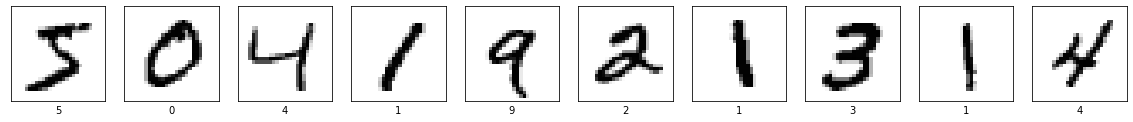

In [7]:

plt.figure(figsize=(20,2))
for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x_train[i], cmap='binary')
        plt.xticks([])
        plt.yticks([])
        # The labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(y_train[i])


In [8]:

# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# reshape decreases dimensions
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [10]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Flatten())
# flatten converts multi dim array into single dim array.
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 61s 32ms/step - loss: 0.6098 - accuracy: 0.7795 - val_loss: 0.0874 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0704 - accuracy: 0.9818 - val_loss: 0.0474 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0398 - accuracy: 0.9892 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0288 - accuracy: 0.9917 - val_loss: 0.0394 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0231 - accuracy: 0.9934 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0188 - accuracy: 0.9950 - val_loss: 0.0348 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0339 - val_accura

In [16]:
#Saving trained model

model.save('my_model_digits.h5')
print("Saved model to disk")

Saved model to disk


In [26]:

#Saving the model

from tensorflow.keras.models import load_model

model=load_model('my_model_digits.h5')

In [38]:

# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def predict_sample():
	# load the image
	img = load_image('images.jpeg')
	# load model
	model = load_model('my_model_digits.h5')
	# predict the class
	# digit = model.predict_classes(img)
	digit = np.argmax(model.predict(img),axis=1)
	print(digit[0])
 
# entry point, run the example
predict_sample()

2


## Evaluate the model

313/313 - 3s - loss: 1.4705 - accuracy: 0.9909


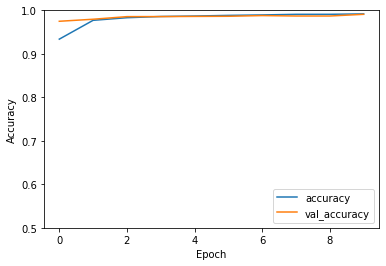

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

0.9908999800682068
